## Packages

In [1]:
install.packages("vegan")
install.packages("tidyverse")
install.packages("cowplot")
install.packages("reshape2")
install.packages("devtools")
install.packages("mvoutlier")
install.packages("comprehenr")

devtools::install_github("gavinsimpson/ggvegan")



The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages

The downloaded binary packages are in
	/var/folders/f7/k4mc7twx41v0xynn3ft86z4r0000gn/T//RtmpkbuB2P/downloaded_packages


Skipping install of 'ggvegan' from a github remote, the SHA1 (058c08c2) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(vegan)
library(ggplot2)
library(cowplot)
library(reshape2)
library(ggvegan)
library(magrittr)
library(mvoutlier)
library(comprehenr)

data("BCI", "BCI.env")


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths



Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


Loading requ

## EDA

Understanding the dataset's structure

In [3]:
dim(BCI)


[1]  50 225

In [4]:
head(BCI)


,Abarema.macradenia,Vachellia.melanoceras,Acalypha.diversifolia,Acalypha.macrostachya,Adelia.triloba,Aegiphila.panamensis,Alchornea.costaricensis,Alchornea.latifolia,Alibertia.edulis,Allophylus.psilospermus,...,Virola.sebifera,Virola.surinamensis,Vismia.baccifera,Vochysia.ferruginea,Xylopia.macrantha,Zanthoxylum.ekmanii,Zanthoxylum.juniperinum,Zanthoxylum.panamense,Zanthoxylum.setulosum,Zuelania.guidonia
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,2,0,0,0,...,17,4,0,0,1,3,0,2,0,0
2,0,0,0,0,0,0,1,0,0,0,...,12,3,0,0,0,4,0,2,0,0
3,0,0,0,0,0,0,2,0,0,0,...,11,2,0,0,0,8,1,2,0,0
4,0,0,0,0,3,0,18,0,0,0,...,16,2,0,0,0,13,1,5,0,1
5,0,0,0,0,1,1,3,0,0,1,...,31,6,0,0,0,3,0,5,0,0
6,0,0,0,0,0,0,2,1,0,0,...,19,1,0,0,0,1,0,3,0,2


The dataset contains 50 sampling plots indicating number of individuals of species of trees counted in each plot

In [5]:
dim(BCI.env)


[1] 50  9

Dataset contains 50 plots (rows) and nine site variables:

- UTM.EW: UTM coordinates (zone 17N) East-West
- UTM.NS: UTM coordinates (zone 17N) North-South
- Precipitation: Precipitation in mm per year
- Elevation: Elevation in m above sea level
- Age.cat: Forest age category
- Geology: The Underlying geological formation
- Habitat: Dominant habitat type based on the map of habitat types, The habitat types are Young forests (ca. 100 years), old forests on > 7 degree slopes (OldSlope), old forests under 152 m elevation (OldLow) and at higher elevation (OldHigh) and Swamp forests
- EnvHet: Environmental Heterogeneity assessed as the Simpson diversity of frequencies of Habitat types
- Stream: "Yes" if there is streamside habitat in the plot

In [6]:
colnames(BCI.env)


[1] "UTM.EW"        "UTM.NS"        "Precipitation" "Elevation"    
[5] "Age.cat"       "Geology"       "Habitat"       "Stream"       
[9] "EnvHet"

In [7]:
head(BCI.env)


,UTM.EW,UTM.NS,Precipitation,Elevation,Age.cat,Geology,Habitat,Stream,EnvHet
,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,625754,1011569,2530,120,c3,Tb,OldSlope,Yes,0.6272
2,625754,1011669,2530,120,c3,Tb,OldLow,Yes,0.3936
3,625754,1011769,2530,120,c3,Tb,OldLow,No,0.0000
4,625754,1011869,2530,120,c3,Tb,OldLow,No,0.0000
5,625754,1011969,2530,120,c3,Tb,OldSlope,No,0.4608
6,625854,1011569,2530,120,c3,Tb,OldLow,No,0.0768


Summing up the trees in all the 50 sampling plots to check the distribution of it and other variables from BCI.env

In [8]:
BCI.env["tree_count"] <- rowSums(BCI)


Distribution plot of the variables in BCI.env

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


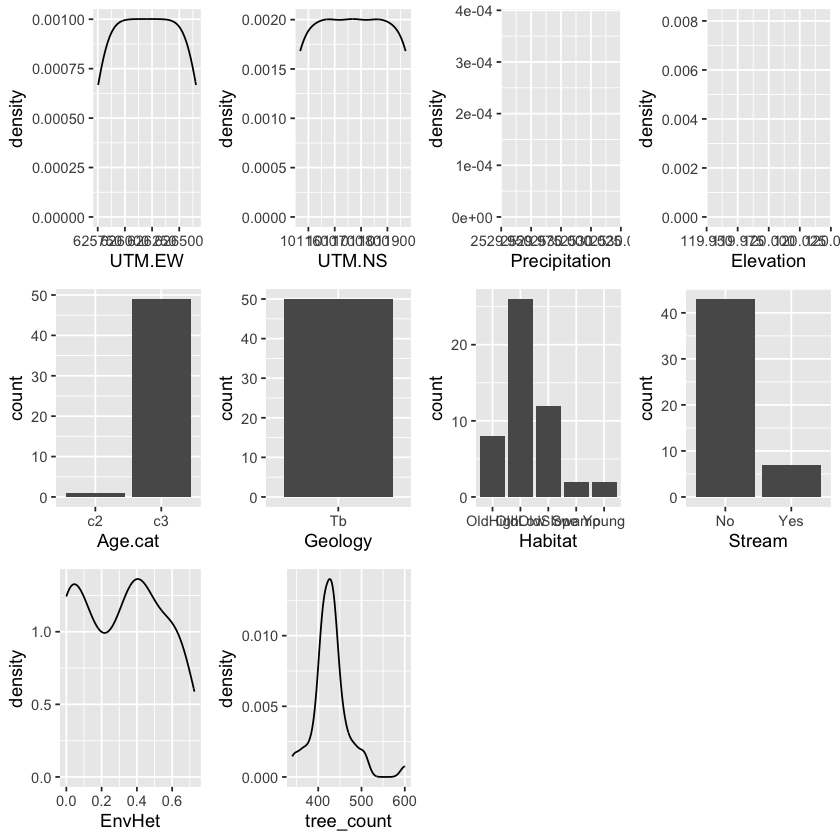

In [9]:
env_plots <- lapply(names(BCI.env), function(var_x) {
  p <-
    ggplot(BCI.env) +
    aes_string(var_x)

  if (is.numeric(BCI.env[[var_x]])) {
    p <- p + geom_density()
  } else {
    p <- p + geom_bar()
  }
})

plot_grid(plotlist = env_plots)


Filtering outliers

In [10]:
# Filtering outliers didn't help to reduce stress of the ndms model

# hist(rowSums(BCI))
# hist(colSums(BCI))
# BCI <- BCI[, which(rowSums(BCI) <= 600)]
# dim(BCI)
# head(BCI)

# BCI <- BCI[, which(colSums(BCI) <= 500)]
# dim(BCI)
# head(BCI)


Investigating the relationship between conditions and number of trees in different points

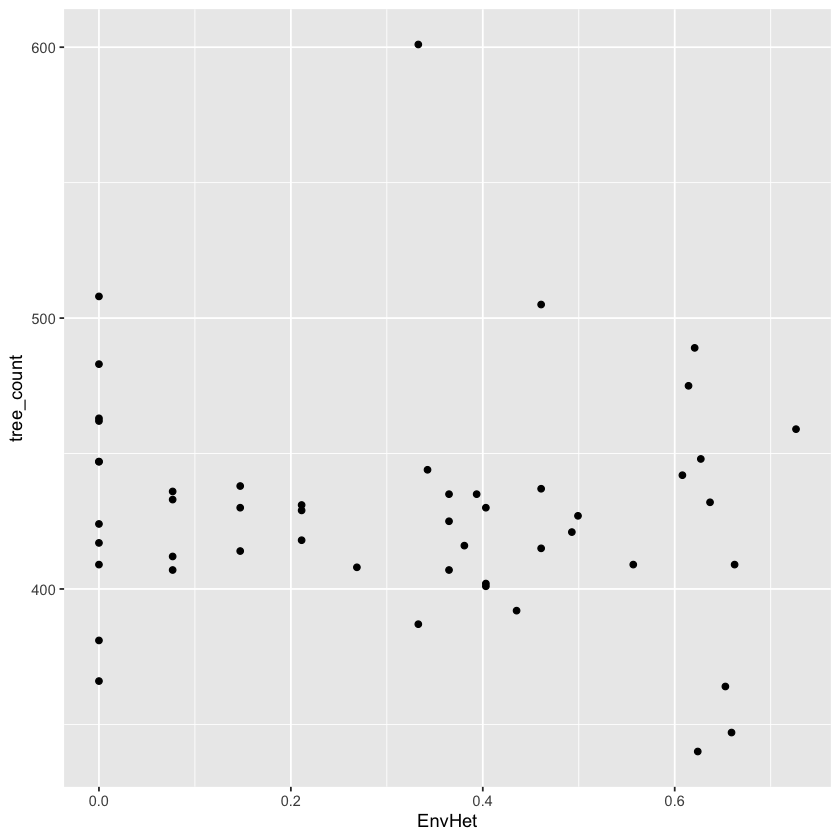

In [11]:
ggplot(BCI.env, aes(x = EnvHet, y = tree_count)) +
    geom_point()


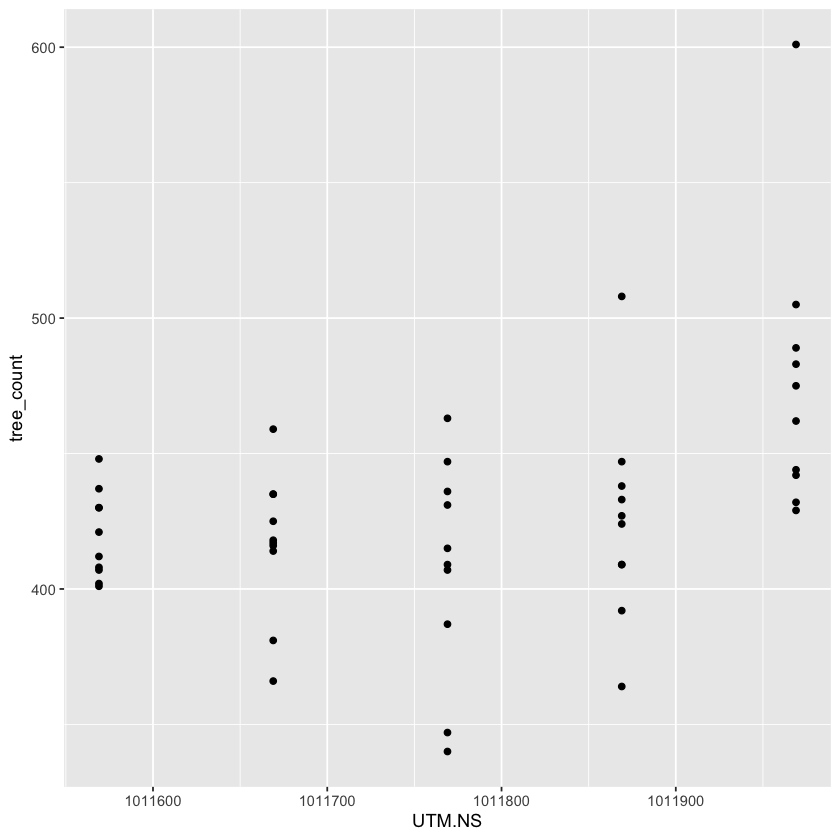

In [12]:
ggplot(BCI.env, aes(x = UTM.NS, y = tree_count)) +
    geom_point()


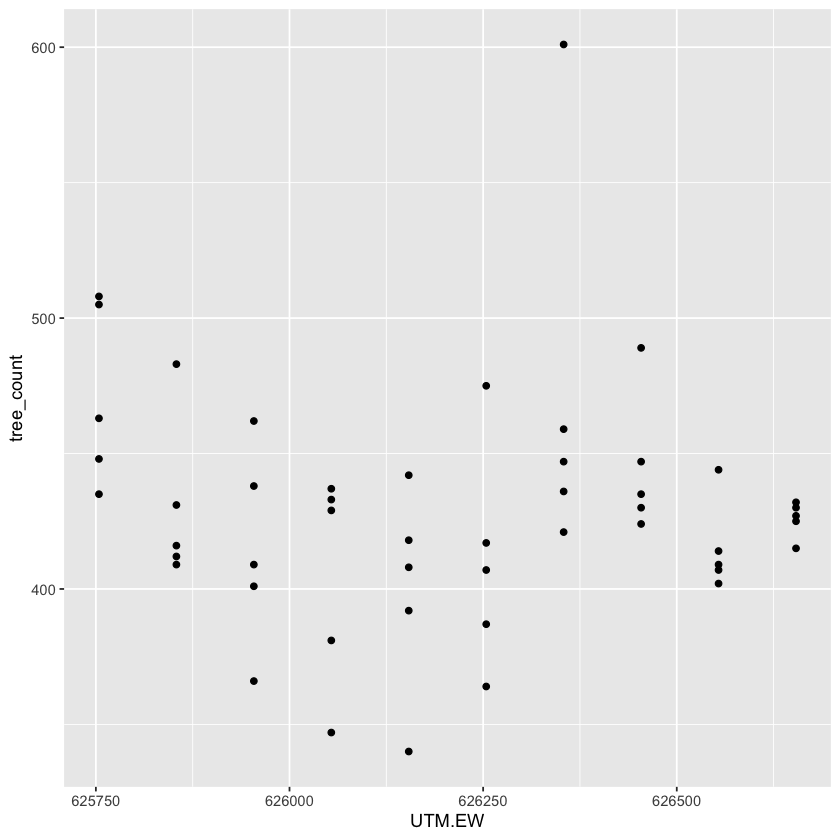

In [13]:
ggplot(BCI.env, aes(x = UTM.EW, y = tree_count)) +
    geom_point()


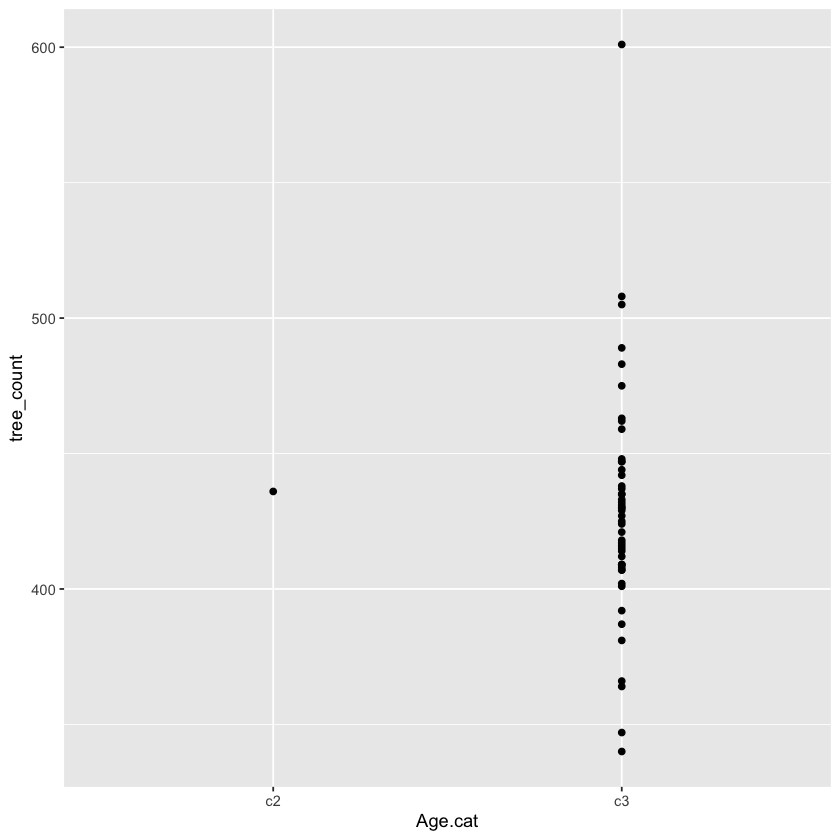

In [14]:
ggplot(BCI.env, aes(x = Age.cat, y = tree_count)) +
    geom_point()


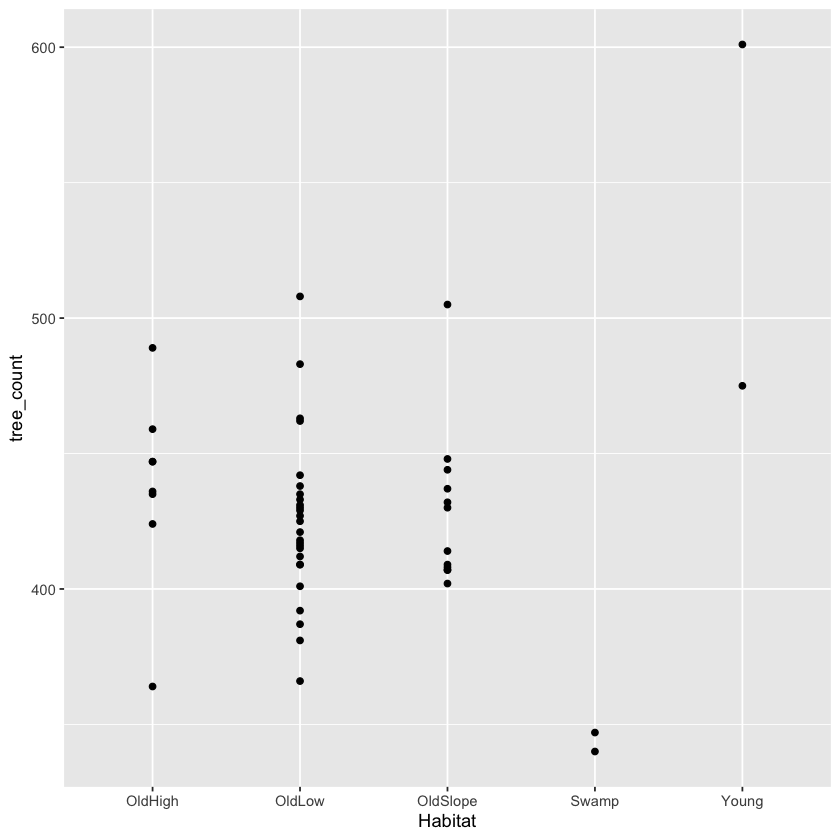

In [15]:
ggplot(BCI.env, aes(x = Habitat, y = tree_count)) +
    geom_point()


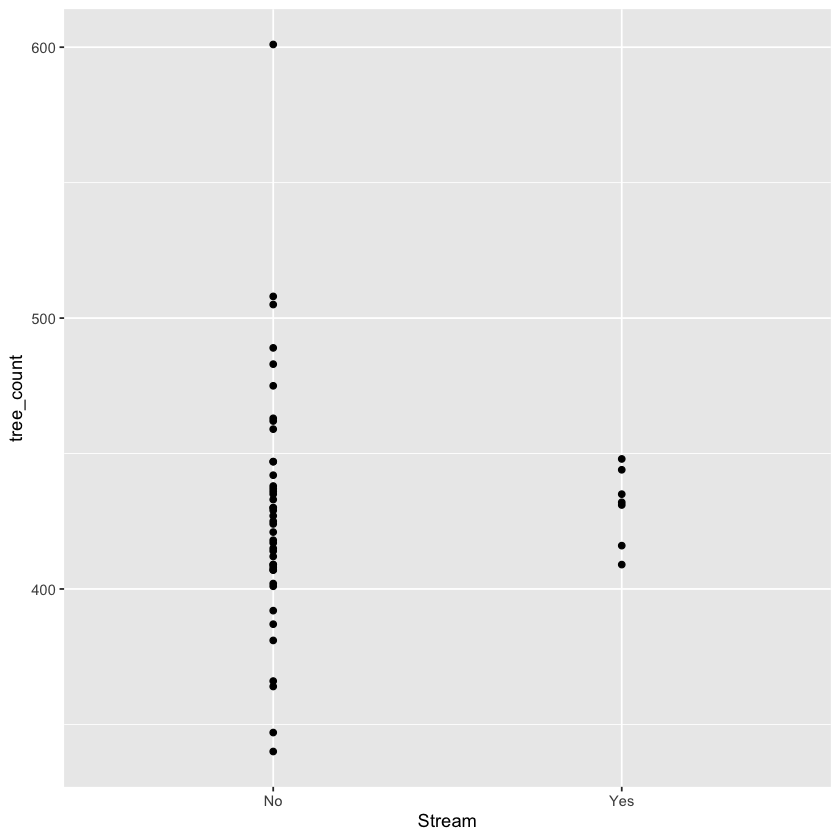

In [16]:
ggplot(BCI.env, aes(x = Stream, y = tree_count)) +
    geom_point()


Deleting tree counts from BCI.env to exclude it from factors

In [17]:
BCI.env$tree_count <- NULL
head(BCI.env)


,UTM.EW,UTM.NS,Precipitation,Elevation,Age.cat,Geology,Habitat,Stream,EnvHet
,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,625754,1011569,2530,120,c3,Tb,OldSlope,Yes,0.6272
2,625754,1011669,2530,120,c3,Tb,OldLow,Yes,0.3936
3,625754,1011769,2530,120,c3,Tb,OldLow,No,0.0000
4,625754,1011869,2530,120,c3,Tb,OldLow,No,0.0000
5,625754,1011969,2530,120,c3,Tb,OldSlope,No,0.4608
6,625854,1011569,2530,120,c3,Tb,OldLow,No,0.0768


## Non-metric MultiDimensional Scaling (NMDS) 

Reducing the dimension of the BCI dataset - obtaining the dissimilarity matrix

In [19]:
nmds <- metaMDS(BCI, dist = "bray", k = 3)


Square root transformation
Wisconsin double standardization
Run 0 stress 0.1800752 
Run 1 stress 0.1801224 
... Procrustes: rmse 0.01239739  max resid 0.06767308 
Run 2 stress 0.1801227 
... Procrustes: rmse 0.01235544  max resid 0.06721752 
Run 3 stress 0.1902122 
Run 4 stress 0.1858908 
Run 5 stress 0.1866663 
Run 6 stress 0.1861938 
Run 7 stress 0.1798345 
... New best solution
... Procrustes: rmse 0.01761562  max resid 0.09593102 
Run 8 stress 0.1810611 
Run 9 stress 0.1857481 
Run 10 stress 0.1923893 
Run 11 stress 0.1857495 
Run 12 stress 0.1798347 
... Procrustes: rmse 0.000276168  max resid 0.0007922742 
... Similar to previous best
Run 13 stress 0.1798348 
... Procrustes: rmse 0.0002977296  max resid 0.001071489 
... Similar to previous best
Run 14 stress 0.1811584 
Run 15 stress 0.1798348 
... Procrustes: rmse 0.0003006793  max resid 0.0007968566 
... Similar to previous best
Run 16 stress 0.1858904 
Run 17 stress 0.1858905 
Run 18 stress 0.1809841 
Run 19 stress 0.1863409 
R

In [20]:
nmds



Call:
metaMDS(comm = BCI, distance = "bray", k = 3) 

global Multidimensional Scaling using monoMDS

Data:     wisconsin(sqrt(BCI)) 
Distance: bray 

Dimensions: 3 
Stress:     0.1798345 
Stress type 1, weak ties
Best solution was repeated 3 times in 20 tries
The best solution was from try 7 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on 'wisconsin(sqrt(BCI))' 


The ordination space

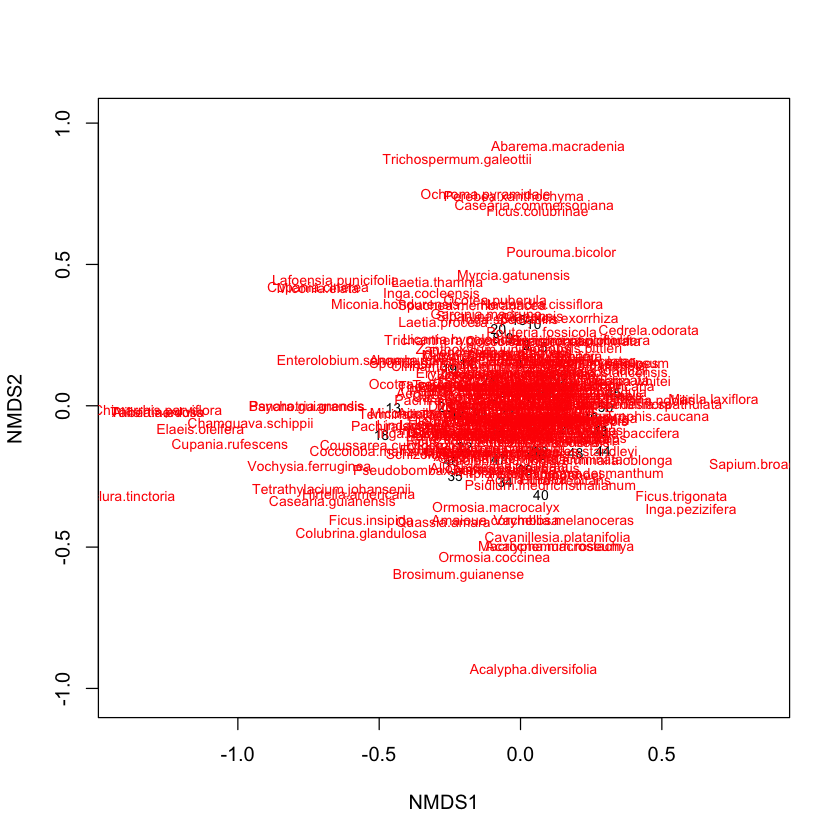

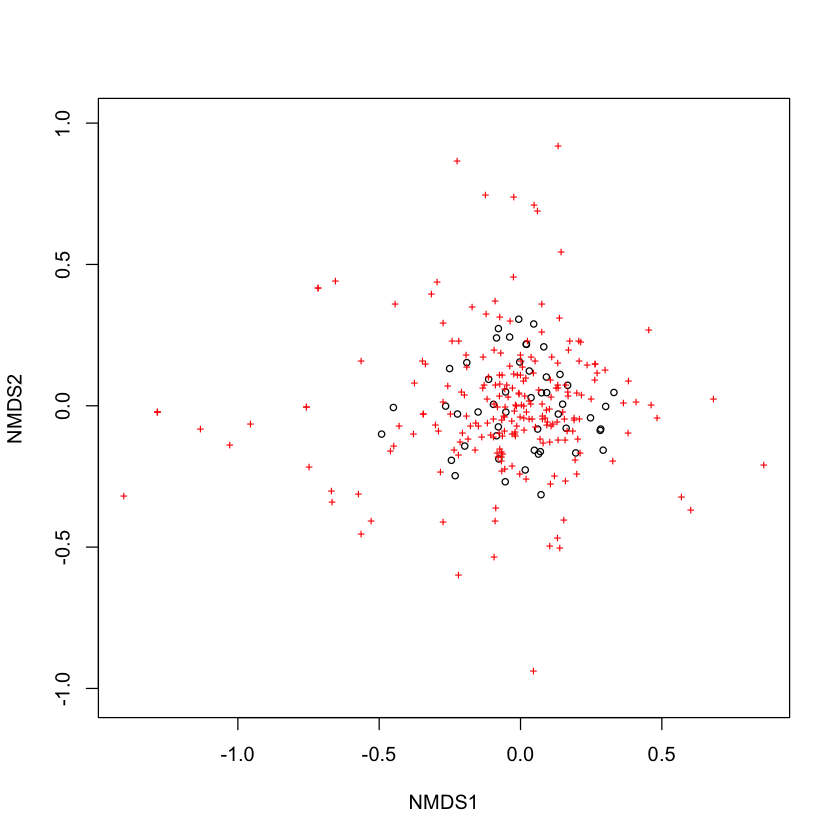

In [21]:
ordiplot(nmds, type = "text")
ordiplot(nmds, type = "points")


The proportion of the overall variance that is explained by each sample unit

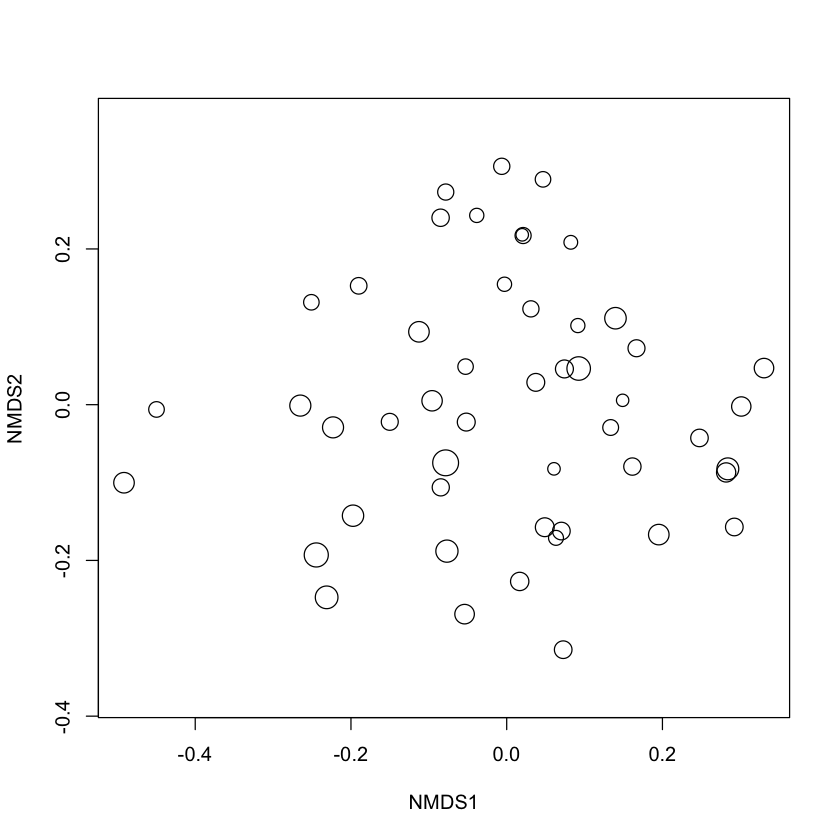

In [22]:
gof <- goodness(object = nmds)
plot(nmds, display = "sites", type = "none")
points(nmds, display = "sites", cex = 2 * gof / mean(gof))


Shepard plot: a plot of dissimilarities vs. ordination distances

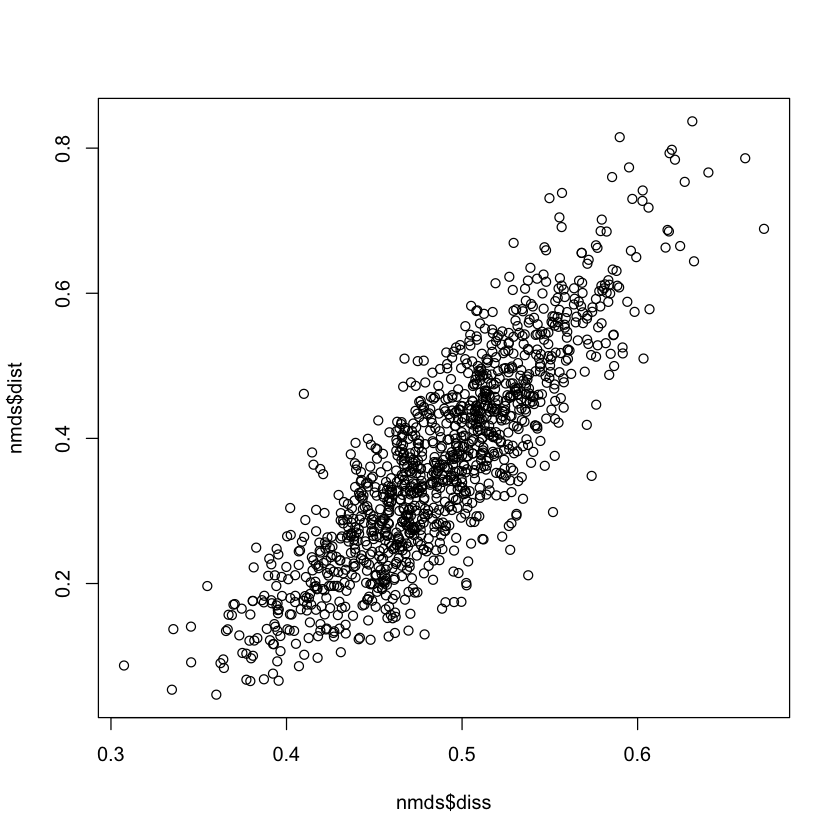

In [23]:
plot(nmds$diss, nmds$dist)


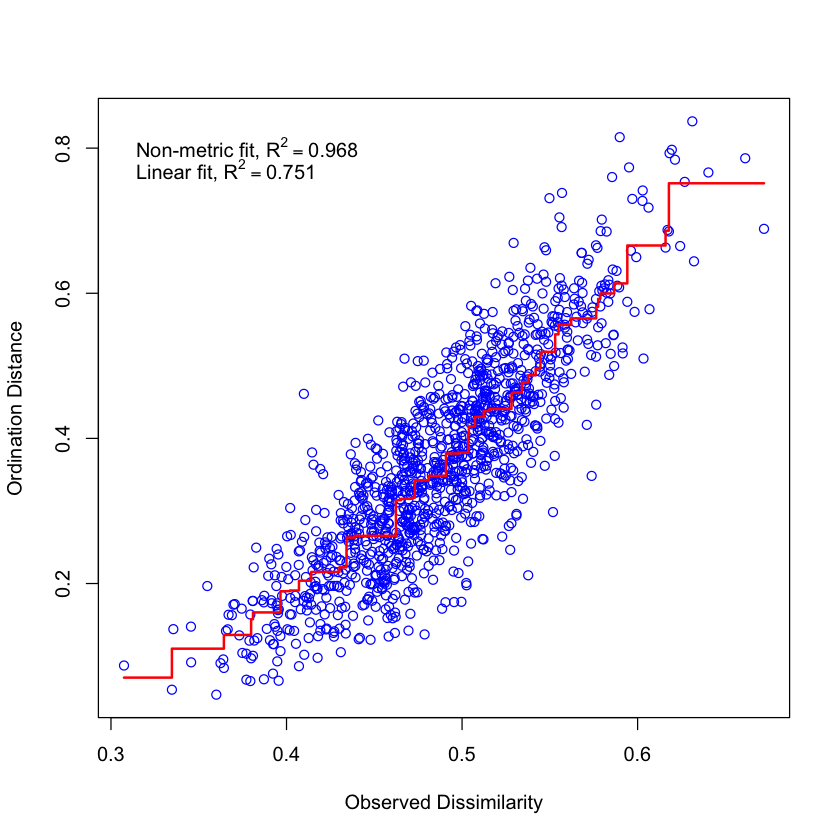

In [24]:
stressplot(nmds)


In [25]:
nmds$stress


[1] 0.1798345

The stress graph is strictly increasing and stress value < 0.2, so it is rather a good fit. But can have a space for improvement.

I've also tried k=2, but had worse values.

## Viz of the relationship between the resulting ordination and environmental parameters

In [26]:
ef <- envfit(nmds, BCI.env)


Warning message in cor(H, Pw):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hpe

Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in cor(Hperm, take):
"the standard deviation is zero"
Warning message in c

Checking the scores and significance of vectors and factors

In [27]:
ef$vectors

ef$factors


                 NMDS1    NMDS2     r2 Pr(>r)    
UTM.EW         0.45369 -0.89116 0.6036  0.001 ***
UTM.NS        -0.38983  0.92088 0.0152  0.708    
Precipitation  0.00000  0.00000 0.0000  1.000    
Elevation      0.00000  0.00000 0.0000  1.000    
EnvHet         0.13321 -0.99109 0.0187  0.622    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Permutation: free
Number of permutations: 999

Centroids:
                  NMDS1   NMDS2
Age.catc2        0.0702 -0.1623
Age.catc3       -0.0014  0.0033
GeologyTb        0.0000  0.0000
HabitatOldHigh   0.0389 -0.1597
HabitatOldLow   -0.0478  0.0493
HabitatOldSlope  0.1724  0.0305
HabitatSwamp    -0.3783 -0.0507
HabitatYoung    -0.1907 -0.1347
StreamNo        -0.0005 -0.0152
StreamYes        0.0028  0.0936

Goodness of fit:
            r2 Pr(>r)    
Age.cat 0.0113  0.668    
Geology 0.0000  1.000    
Habitat 0.3929  0.001 ***
Stream  0.0254  0.264    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Permutation: free
Number of permutations: 999

Warning message in arrows(at[1], at[2], vect[, 1], vect[, 2], length = 0.05, col = col):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(at[1], at[2], vect[, 1], vect[, 2], length = 0.05, col = col):
"zero-length arrow is of indeterminate angle and so skipped"


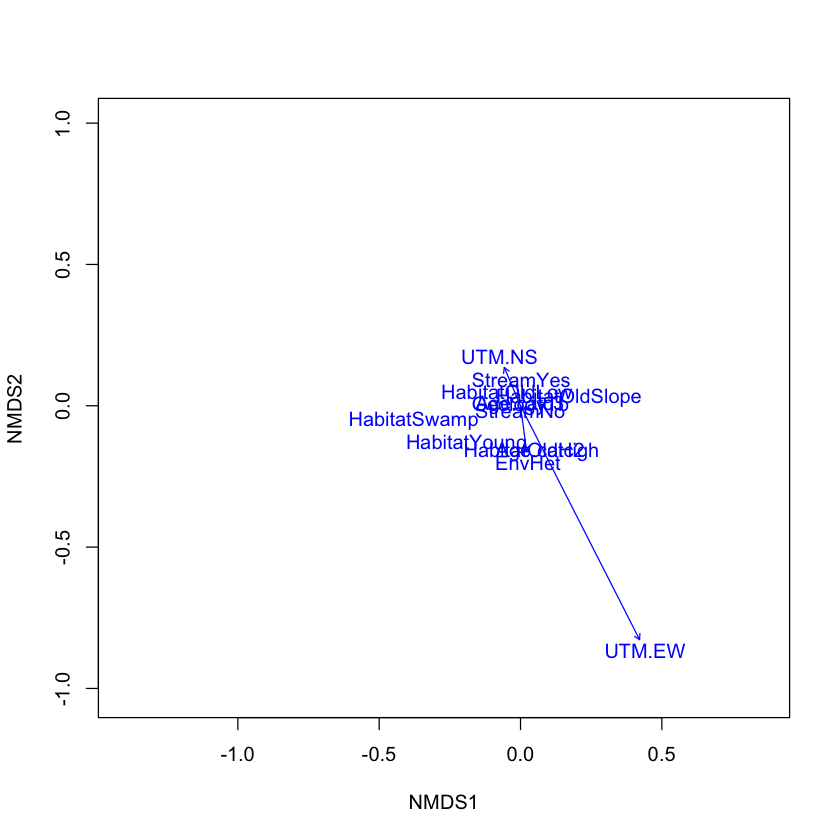

In [28]:
ordiplot(nmds, type = "n")
plot(ef)


Plotting only significant values

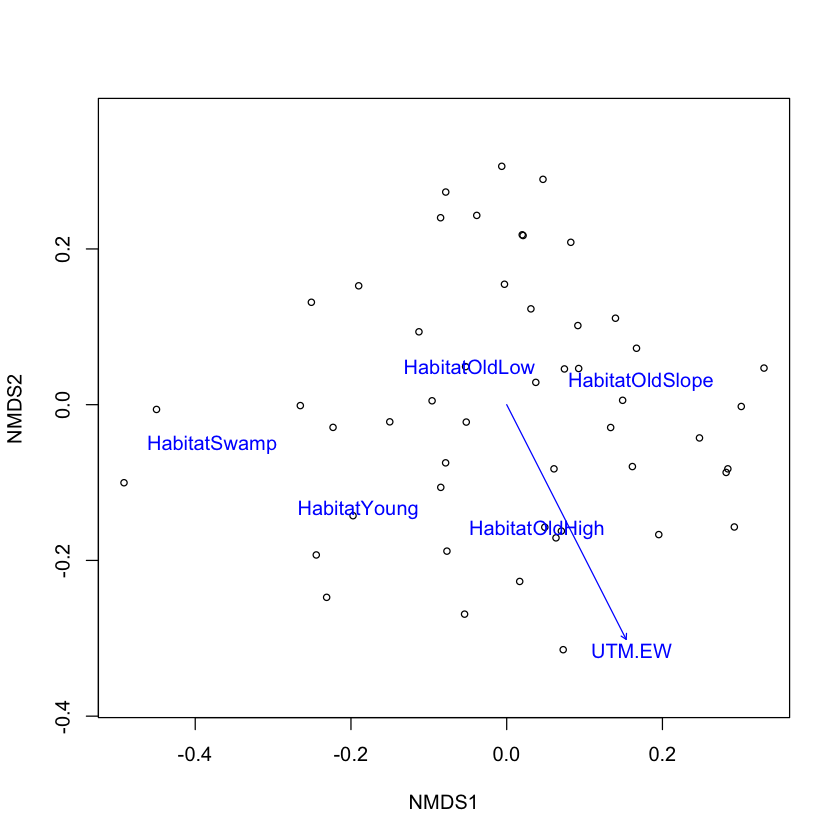

In [29]:
plot(nmds, display = "sites")
plot(ef, p.max = 0.05) # only display variables that are significant


As we can see, habitat is the most important factor and Easr-West coordinates are most important vector variable

## Plotting the surface of the most important factors

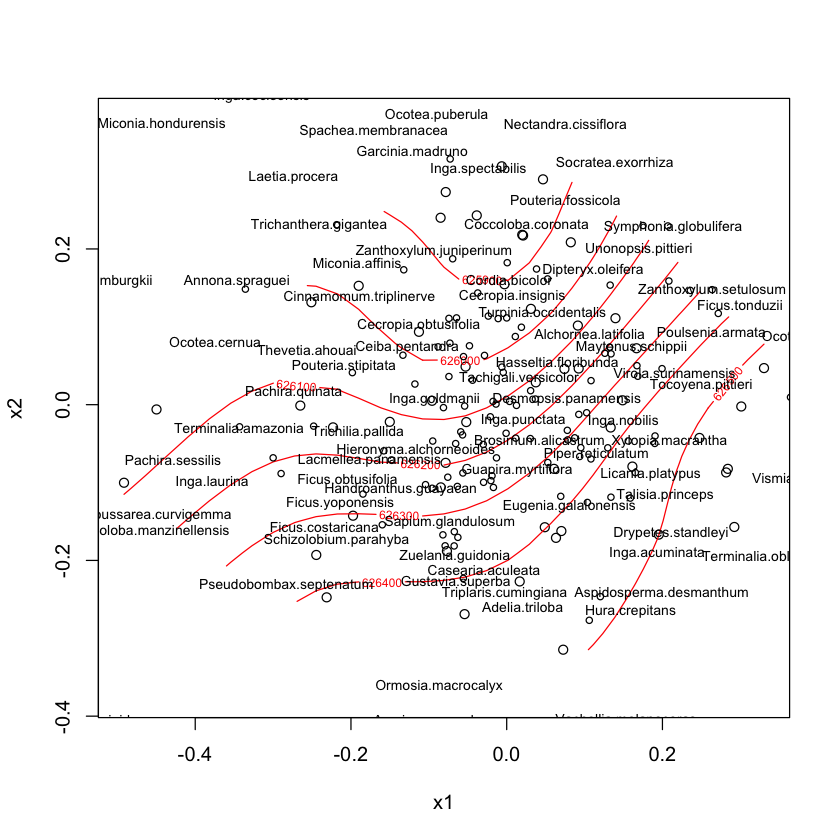

In [30]:
os_UTM_EW <- ordisurf(nmds, BCI.env$UTM.EW, method = "REML", plot = FALSE)

plot(os_UTM_EW)
orditorp(nmds,
    display = "species"
)


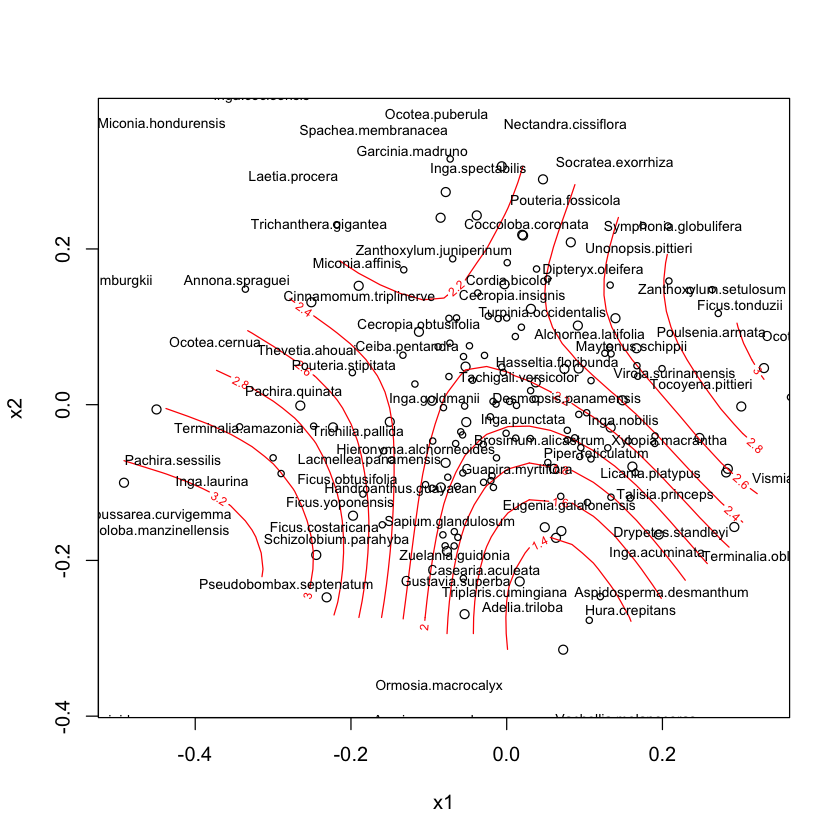

In [31]:
os_Habitat <- ordisurf(nmds, as.integer(factor(BCI.env$Habitat)), method = "REML", plot = FALSE)
plot(os_Habitat)
orditorp(nmds,
    display = "species"
)


In [32]:
os_UTM_EW



Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
6.52  total = 7.52 

REML score: 329.2158     

In [33]:
os_Habitat



Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
4.84  total = 5.84 

REML score: 63.60929     

## Conclusions

In conclusion, our analysis utilizing NMDS method, with distances derived from species abundances, investigated the correlation between floral composition and environmental factors. The analysis and visualizations revealed that a little number of factors showed a significant relationship with species presence. 

A notable finding emerged: there are distinct clusters of species corresponding to different habitat types and East-West coordinates with significant p-values=0.001.